In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['dataset']


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow-gpu==2.0.0-beta1
import tensorflow as tf

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

     |████████████████████████████████| 348.9MB 44kB/s s eta 0:00:01   |█▎                              | 14.5MB 9.7MB/s eta 0:00:35     |███████████████████             | 207.8MB 50.5MB/s eta 0:00:03
     |████████████████████████████████| 501kB 37.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 23.9MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 36.2MB/s eta 0:00:01                         | 522kB 36.2MB/s eta 0:00:01   | 2.2MB 36.2MB/s eta 0:00:01


In [3]:
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_jpeg(image)

  w = tf.shape(image)[1]

  w = w // 2
  real_image = image[:, :w, :]
  input_image = image[:, w:, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

In [4]:
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

checking


In [5]:
path='../input/dataset/facades'

In [6]:
facade_train=[f for f in os.listdir(os.path.join(path, 'train'))]

In [7]:
len(facade_train)

400

In [8]:
import scipy.misc
import scipy.ndimage

In [9]:
input_images=[]
real_images=[]

In [10]:
import scipy.misc
import scipy.ndimage

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for img in facade_train:
    final_path=os.path.join('../input/dataset/facades/train',img)
    inp, re = load(final_path)
    inp=rgb2gray(inp)
    inp=np.array(inp)
    input_images.append(inp)
    re=rgb2gray(re)
    re=np.array(re)
    real_images.append(re)
    

In [12]:
def visualize_bw_image(img):
    """
    Visualize a black and white image
    """
    img= img.squeeze()

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.axis("off")
    ax.set_title("Image")
    plt.show()

In [13]:
real_images=np.stack(real_images)

In [14]:
real_images.shape

(400, 256, 256)

In [15]:
real_images=real_images.reshape((400, 256, 256, 1))

In [16]:
real_images.shape

(400, 256, 256, 1)

In [17]:
input_images=np.stack(input_images)

In [18]:
input_images=input_images.reshape((400, 256, 256, 1))

In [19]:
real_images[0].shape

(256, 256, 1)

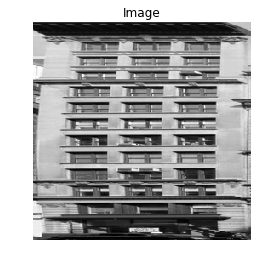

In [20]:
visualize_bw_image(real_images[0]/255)

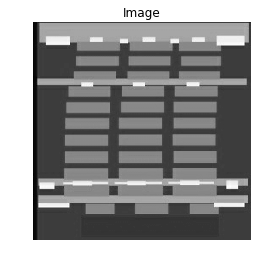

In [21]:
visualize_bw_image(input_images[0]/255.0)

In [22]:
training_facade_photos=real_images
training_facade_labels=input_images

In [23]:
path='../input/dataset/facades'
facade_test=[f for f in os.listdir(os.path.join(path, 'test'))]

In [24]:
input_images=[]
real_images=[]

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for img in facade_test:
    final_path=os.path.join('../input/dataset/facades/test',img)
    inp, re = load(final_path)
    inp=np.array(inp)
    inp=rgb2gray(inp)
    input_images.append(inp)
    re=np.array(re)
    re=rgb2gray(re)
    real_images.append(re)

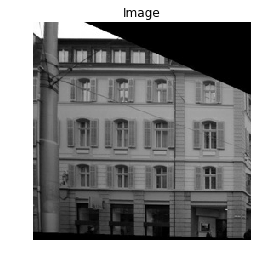

In [26]:
visualize_bw_image(real_images[0]/255)

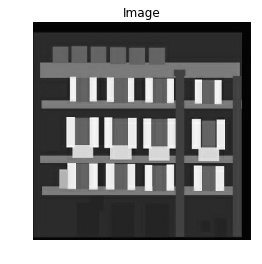

In [27]:
visualize_bw_image(input_images[0]/255.0)

In [28]:
real_images=np.stack(real_images)

In [29]:
input_images=np.stack(input_images)

In [30]:
real_images.shape
input_images.shape

(106, 256, 256)

In [31]:
input_images.shape

(106, 256, 256)

In [32]:
real_images=real_images.reshape((106, 256, 256, 1))
input_images=input_images.reshape((106, 256, 256, 1))

In [33]:
test_facade_photos=real_images
test_facade_labels=input_images

In [34]:
path='../input/dataset/facades'
facade_val=[f for f in os.listdir(os.path.join(path, 'val'))]

In [35]:
input_images=[]
real_images=[]

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

for img in facade_val:
    final_path=os.path.join('../input/dataset/facades/val',img)
    inp, re = load(final_path)
    inp=np.array(inp)
    inp=rgb2gray(inp)
    input_images.append(inp)
    re=np.array(re)
    re=rgb2gray(re)
    real_images.append(re)

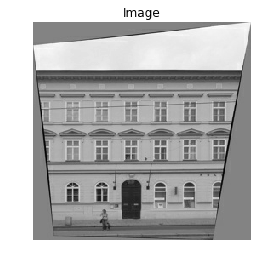

In [37]:
visualize_bw_image(real_images[0]/255)

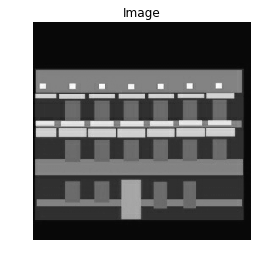

In [38]:
visualize_bw_image(input_images[0]/255.0)

In [39]:
real_images=np.stack(real_images)

In [40]:
input_images=np.stack(input_images)

In [41]:
real_images.shape

(100, 256, 256)

In [42]:
real_images=real_images.reshape((100, 256, 256, 1))
input_images=input_images.reshape((100, 256, 256, 1))

In [43]:
real_images.shape

(100, 256, 256, 1)

In [44]:
validation_facade_photos=real_images
validation_facade_labels=input_images

In [45]:
#!pip install tensorflow==1.13.1
#!pip install keras==2.0.9

In [46]:
#!pip install -q tensorflow==2.0.0-alpha0

In [47]:
# !pip install absl-py==0.4.1
# !pip install astor==0.7.1
# !pip install cycler==0.10.0
# !pip install gast==0.2.0
# !pip install graphviz==0.9

# !pip install grpcio==1.15.0

# !pip install Keras==2.2.2

# !pip install Keras-Applications==1.0.4

# !pip install Keras-Preprocessing==1.0.2

# !pip install kiwisolver==1.0.1

# !pip install Markdown==2.6.11

# !pip install matplotlib==3.0.0

# !pip install numpy==1.14.5

# !pip install opencv-python==3.4.3.18

# !pip install pkg-resources==0.0.0

# !pip install protobuf==3.6.1

# !pip install pydot==1.2.4

# !pip install pyparsing==2.2.1
# !pip install python-dateutil==2.7.3

# !pip install PyYAML==3.13

# !pip install scipy==1.1.0

# !pip install six==1.11.0

# !pip install tensorboard==1.10.0

# !pip install tensorflow==1.10.1

# !pip install termcolor==1.1.0

# !pip install Werkzeug==0.14.1


In [48]:
!pip install tensorboard==1.13.0

     |████████████████████████████████| 3.2MB 9.4MB/s eta 0:00:01
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1


In [49]:
import tensorflow as tf

In [50]:
import os
import time

import h5py
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
from cv2 import imwrite
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Convolution2D, LeakyReLU, BatchNormalization, UpSampling2D, Dropout, Activation, Flatten,  Dense, Lambda, Reshape, concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [51]:
# import os
# import time
# import h5py
# import tensorflow.keras.backend as K
# import matplotlib.pyplot as plt
# import numpy as np
# from cv2 import imwrite
# from keras import Input, Model
# from tensorflow.keras.layers import Convolution2D, LeakyReLU, BatchNormalization, UpSampling2D, Dropout
# from tensorflow.keras.optimizers import Adam

In [52]:
def build_unet_generator():
    """
    Create the U-Net Generator using the hyperparameter values defined below
    """
    kernel_size = 4
    strides = 2
    leakyrelu_alpha = 0.2
    upsampling_size = 2
    dropout = 0.4
    output_channels = 1
    input_shape = (256, 256, 1)

    input_layer = Input(shape=input_shape)

    # Encoder Network

    # 1st Convolutional block in the encoder network
    encoder1 = Convolution2D(filters=64, kernel_size=kernel_size, padding='same',
                             strides=strides)(input_layer)
    encoder1 = LeakyReLU(alpha=leakyrelu_alpha)(encoder1)

    # 2nd Convolutional block in the encoder network
    encoder2 = Convolution2D(filters=128, kernel_size=kernel_size, padding='same',
                             strides=strides)(encoder1)
    encoder2 = BatchNormalization()(encoder2)
    encoder2 = LeakyReLU(alpha=leakyrelu_alpha)(encoder2)

    # 3rd Convolutional block in the encoder network
    encoder3 = Convolution2D(filters=256, kernel_size=kernel_size, padding='same',
                             strides=strides)(encoder2)
    encoder3 = BatchNormalization()(encoder3)
    encoder3 = LeakyReLU(alpha=leakyrelu_alpha)(encoder3)

    # 4th Convolutional block in the encoder network
    encoder4 = Convolution2D(filters=512, kernel_size=kernel_size, padding='same',
                             strides=strides)(encoder3)
    encoder4 = BatchNormalization()(encoder4)
    encoder4 = LeakyReLU(alpha=leakyrelu_alpha)(encoder4)

    # 5th Convolutional block in the encoder network
    encoder5 = Convolution2D(filters=512, kernel_size=kernel_size, padding='same',
                             strides=strides)(encoder4)
    encoder5 = BatchNormalization()(encoder5)
    encoder5 = LeakyReLU(alpha=leakyrelu_alpha)(encoder5)

    # 6th Convolutional block in the encoder network
    encoder6 = Convolution2D(filters=512, kernel_size=kernel_size, padding='same',
                             strides=strides)(encoder5)
    encoder6 = BatchNormalization()(encoder6)
    encoder6 = LeakyReLU(alpha=leakyrelu_alpha)(encoder6)

    # 7th Convolutional block in the encoder network
    encoder7 = Convolution2D(filters=512, kernel_size=kernel_size, padding='same',
                             strides=strides)(encoder6)
    encoder7 = BatchNormalization()(encoder7)
    encoder7 = LeakyReLU(alpha=leakyrelu_alpha)(encoder7)

    # 8th Convolutional block in the encoder network
    encoder8 = Convolution2D(filters=512, kernel_size=kernel_size, padding='same',
                             strides=strides)(encoder7)
    encoder8 = BatchNormalization()(encoder8)
    encoder8 = LeakyReLU(alpha=leakyrelu_alpha)(encoder8)

    # Decoder Network

    # 1st Upsampling Convolutional Block in the decoder network
    decoder1 = UpSampling2D(size=upsampling_size)(encoder8)
    decoder1 = Convolution2D(filters=512, kernel_size=kernel_size, padding='same')(decoder1)
    decoder1 = BatchNormalization()(decoder1)
    decoder1 = Dropout(dropout)(decoder1)
    decoder1 = concatenate([decoder1, encoder7], axis=3)
    decoder1 = LeakyReLU(alpha=leakyrelu_alpha)(decoder1)

    # 2nd Upsampling Convolutional block in the decoder network
    decoder2 = UpSampling2D(size=upsampling_size)(decoder1)
    decoder2 = Convolution2D(filters=1024, kernel_size=kernel_size, padding='same')(decoder2)
    decoder2 = BatchNormalization()(decoder2)
    decoder2 = Dropout(dropout)(decoder2)
    decoder2 = concatenate([decoder2, encoder6])
    decoder2 = LeakyReLU(alpha=leakyrelu_alpha)(decoder2)

    # 3rd Upsampling Convolutional block in the decoder network
    decoder3 = UpSampling2D(size=upsampling_size)(decoder2)
    decoder3 = Convolution2D(filters=1024, kernel_size=kernel_size, padding='same')(decoder3)
    decoder3 = BatchNormalization()(decoder3)
    decoder3 = Dropout(dropout)(decoder3)
    decoder3 = concatenate([decoder3, encoder5])
    decoder3 = LeakyReLU(alpha=leakyrelu_alpha)(decoder3)

    # 4th Upsampling Convolutional block in the decoder network
    decoder4 = UpSampling2D(size=upsampling_size)(decoder3)
    decoder4 = Convolution2D(filters=1024, kernel_size=kernel_size, padding='same')(decoder4)
    decoder4 = BatchNormalization()(decoder4)
    decoder4 = concatenate([decoder4, encoder4])
    decoder4 = LeakyReLU(alpha=leakyrelu_alpha)(decoder4)

    # 5th Upsampling Convolutional block in the decoder network
    decoder5 = UpSampling2D(size=upsampling_size)(decoder4)
    decoder5 = Convolution2D(filters=1024, kernel_size=kernel_size, padding='same')(decoder5)
    decoder5 = BatchNormalization()(decoder5)
    decoder5 = concatenate([decoder5, encoder3])
    decoder5 = LeakyReLU(alpha=leakyrelu_alpha)(decoder5)

    # 6th Upsampling Convolutional block in the decoder network
    decoder6 = UpSampling2D(size=upsampling_size)(decoder5)
    decoder6 = Convolution2D(filters=512, kernel_size=kernel_size, padding='same')(decoder6)
    decoder6 = BatchNormalization()(decoder6)
    decoder6 = concatenate([decoder6, encoder2])
    decoder6 = LeakyReLU(alpha=leakyrelu_alpha)(decoder6)

    # 7th Upsampling Convolutional block in the decoder network
    decoder7 = UpSampling2D(size=upsampling_size)(decoder6)
    decoder7 = Convolution2D(filters=256, kernel_size=kernel_size, padding='same')(decoder7)
    decoder7 = BatchNormalization()(decoder7)
    decoder7 = concatenate([decoder7, encoder1])
    decoder7 = LeakyReLU(alpha=leakyrelu_alpha)(decoder7)

    # Last Convolutional layer
    decoder8 = UpSampling2D(size=upsampling_size)(decoder7)
    decoder8 = Convolution2D(filters=output_channels, kernel_size=kernel_size, padding='same')(decoder8)
    decoder8 = Activation('tanh')(decoder8)

    model = Model(inputs=[input_layer], outputs=[decoder8])
    return model


In [53]:
def build_patchgan_discriminator():
    """
    Create the PatchGAN discriminator using the hyperparameter values defined below
    """
    kernel_size = 4
    strides = 2
    leakyrelu_alpha = 0.2
    padding = 'same'
    num_filters_start = 64  # Number of filters to start with
    num_kernels = 100
    kernel_dim = 5
    patchgan_output_dim = (256, 256, 1)
    patchgan_patch_dim = (256, 256, 1)
    number_patches = int(
        (patchgan_output_dim[0] / patchgan_patch_dim[0]) * (patchgan_output_dim[1] / patchgan_patch_dim[1]))

    input_layer = Input(shape=patchgan_patch_dim)

    des = Convolution2D(filters=64, kernel_size=kernel_size, padding=padding, strides=strides)(input_layer)
    des = LeakyReLU(alpha=leakyrelu_alpha)(des)

    # Calculate the number of convolutional layers
    total_conv_layers = int(np.floor(np.log(patchgan_output_dim[1]) / np.log(2)))
    list_filters = [num_filters_start * min(total_conv_layers, (2 ** i)) for i in range(total_conv_layers)]

    # Next 7 Convolutional blocks
    for filters in list_filters[1:]:
        des = Convolution2D(filters=filters, kernel_size=kernel_size, padding=padding, strides=strides)(des)
        des = BatchNormalization()(des)
        des = LeakyReLU(alpha=leakyrelu_alpha)(des)

    # Add a flatten layer
    flatten_layer = Flatten()(des)

    # Add the final dense layer
    dense_layer = Dense(units=2, activation='softmax')(flatten_layer)

    # Create the PatchGAN model
    model_patch_gan = Model(inputs=[input_layer], outputs=[dense_layer, flatten_layer])

    # Create a list of input layers equal to the number of patches
    list_input_layers = [Input(shape=patchgan_patch_dim) for _ in range(number_patches)]

    # Pass the patches through the PatchGAN network
    output1 = [model_patch_gan(patch)[0] for patch in list_input_layers]
    output2 = [model_patch_gan(patch)[1] for patch in list_input_layers]

    # In case of multiple patches, concatenate outputs to calculate perceptual loss
    if len(output1) > 1:
        output1 = concatenate(output1)
    else:
        output1 = output1[0]

    # In case of multiple patches, merge output2 as well
    if len(output2) > 1:
        output2 = concatenate(output2)
    else:
        output2 = output2[0]

    # Add a dense layer
    dense_layer2 = Dense(num_kernels * kernel_dim, use_bias=False, activation=None)

    # Add a lambda layer
    custom_loss_layer = Lambda(lambda x: K.sum(
        K.exp(-K.sum(K.abs(K.expand_dims(x, 3) - K.expand_dims(K.permute_dimensions(x, pattern=(1, 2, 0)), 0)), 2)), 2))

    # Pass the output2 tensor through dense_layer2
    output2 = dense_layer2(output2)

    # Reshape the output2 tensor
    output2 = Reshape((num_kernels, kernel_dim))(output2)

    # Pass the output2 tensor through the custom_loss_layer
    output2 = custom_loss_layer(output2)

    # Finally concatenate output1 and output2
    output1 = concatenate([output1, output2])
    final_output = Dense(2, activation="softmax")(output1)

    # Create a discriminator model
    discriminator = Model(inputs=list_input_layers, outputs=[final_output])
    return discriminator

In [54]:
def build_adversarial_model(generator, discriminator):
    """
    Create an adversarial model
    """
    input_image_dim = (256, 256, 1)
    patch_dim = (256, 256)

    # Create an input layer
    input_layer = Input(shape=input_image_dim)

    # Use the generator network to generate images
    generated_images = generator(input_layer)

    # Extract patches from the generated images
    img_height, img_width = input_img_dim[:2]
    patch_height, patch_width = patch_dim

    row_idx_list = [(i * patch_height, (i + 1) * patch_height) for i in range(int(img_height / patch_height))]
    column_idx_list = [(i * patch_width, (i + 1) * patch_width) for i in range(int(img_width / patch_width))]

    generated_patches_list = []
    for row_idx in row_idx_list:
        for column_idx in column_idx_list:
            generated_patches_list.append(Lambda(lambda z: z[:, column_idx[0]:column_idx[1], row_idx[0]:row_idx[1], :],
                                                 output_shape=input_img_dim)(generated_images))

    discriminator.trainable = False

    # Pass the generated patches through the discriminator network
    dis_output = discriminator(generated_patches_list)

    # Create a model
    model = Model(inputs=[input_layer], outputs=[generated_images, dis_output])
    return model

In [55]:
epochs = 100
num_images_per_epoch = 400
batch_size = 20
img_width = 256
img_height = 256
num_channels = 1
input_img_dim = (256, 256, 1)
patch_dim = (256, 256)

In [56]:
common_optimizer = Adam(lr=0.0002, beta_1=0.9, beta_2=0.999,epsilon=1e-08)

In [57]:
patchgan_discriminator = build_patchgan_discriminator()
patchgan_discriminator.compile(loss='binary_crossentropy', optimizer=common_optimizer)

In [58]:
# def write_log(callback, name, loss, batch_no):
#     """
#     Write training summary to TensorBoard
#     """
#     # for name, value in zip(names, logs):
#     summary = tf.Summary()
#     summary_value = summary.value.add()
#     summary_value.simple_value = loss
#     summary_value.tag = name
#     callback.writer.add_summary(summary, batch_no)
#     callback.writer.flush()


In [59]:
def save_bw_image(img, path):
    """
    Save a black and white image
    """
    img= img.squeeze()
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.axis("off")
    ax.set_title("Image")
    plt.savefig(path)

In [60]:
def visualize_rgb(img):
    """
    Visualize a rgb image
    :param img: RGB image
    """
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title("Image")
    plt.show()

In [61]:
def save_images(real_images, real_sketches, generated_images, num_epoch, dataset_name, limit):
    real_sketches = real_sketches * 255.0
    real_images = real_images * 255.0
    generated_images = generated_images * 255.0

    # Save some images only
    real_sketches = real_sketches[:limit]
    generated_images = generated_images[:limit]
    real_images = real_images[:limit]

    # Create a stack of images
    X = np.hstack((real_sketches, generated_images, real_images))

    # Save stack of images
    imwrite('results/X_full_{}_{}.png'.format(dataset_name, num_epoch), X[0])

In [62]:
def generate_and_extract_patches(images, facades, generator_model, batch_counter, patch_dim):
    # Alternatively, train the discriminator network on real and generated images
    if batch_counter % 2 == 0:
        # Generate fake images
        output_images = generator_model.predict(facades)

        # Create a batch of ground truth labels
        labels = np.zeros((output_images.shape[0], 2), dtype=np.uint8)
        labels[:, 0] = 1

    else:
        # Take real images
        output_images = images

        # Create a batch of ground truth labels
        labels = np.zeros((output_images.shape[0], 2), dtype=np.uint8)
        labels[:, 1] = 1

    patches = []
    for y in range(0, output_images.shape[0], patch_dim[0]):
        for x in range(0, output_images.shape[1], patch_dim[1]):
            image_patches = output_images[:, y: y + patch_dim[0], x: x + patch_dim[1], :]
            patches.append(np.asarray(image_patches, dtype=np.float32))

    return patches, labels

In [63]:
unet_generator = build_unet_generator()
unet_generator.compile(loss='mae', optimizer=common_optimizer)

In [64]:
adversarial_model = build_adversarial_model(unet_generator, patchgan_discriminator)
adversarial_model.compile(loss=['mae', 'binary_crossentropy'], loss_weights=[1E2, 1], optimizer=common_optimizer)

In [65]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time.time()))
tensorboard.set_model(unet_generator)
tensorboard.set_model(patchgan_discriminator)

In [66]:
epochs=100

Starting the training...
Epoch 0
Batch:0
Discriminator loss: -0.0
Generator loss: [11546.218, 115.46218, 0.0]
Batch:1
Discriminator loss: 15.379092
Generator loss: [11954.967, 119.54967, 0.0]
Batch:2
Discriminator loss: -0.0
Generator loss: [11522.11, 115.22111, 0.0]
Batch:3
Discriminator loss: 15.379092
Generator loss: [11858.016, 118.580154, 0.0]
Batch:4
Discriminator loss: -0.0
Generator loss: [11693.181, 116.93181, 0.0]
Batch:5
Discriminator loss: 15.379092
Generator loss: [11629.096, 116.290955, 0.0]
Batch:6
Discriminator loss: -0.0
Generator loss: [11799.512, 117.99512, 0.0]
Batch:7
Discriminator loss: 15.379092
Generator loss: [11065.651, 110.65651, 0.0]
Batch:8
Discriminator loss: -0.0
Generator loss: [11567.157, 115.67157, 0.0]
Batch:9
Discriminator loss: 15.379092
Generator loss: [11516.251, 115.16251, 0.0]
Batch:10
Discriminator loss: -0.0
Generator loss: [10832.213, 108.32213, 0.0]
Batch:11
Discriminator loss: 15.379092
Generator loss: [11580.516, 115.80516, 0.0]
Batch:12
D

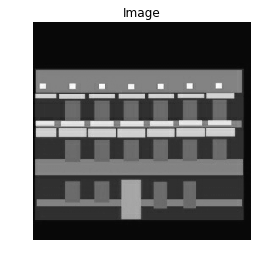

facade real_image:-


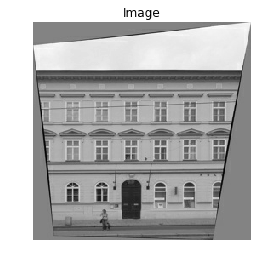

facade generated_image:-


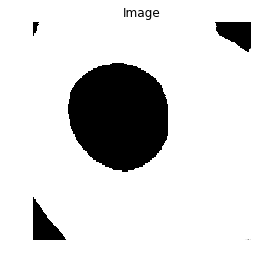

facade label:-


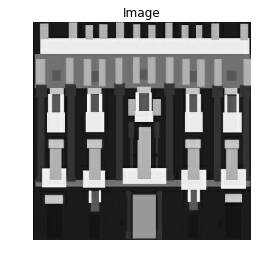

facade real_image:-


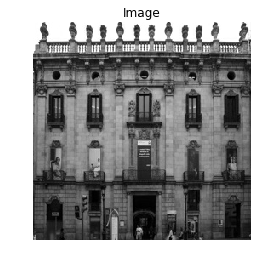

facade generated_image:-


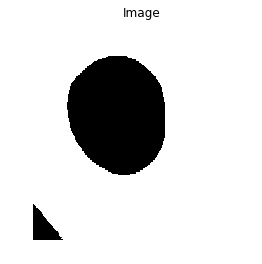

facade label:-


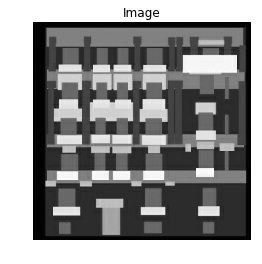

facade real_image:-


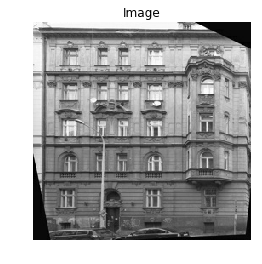

facade generated_image:-


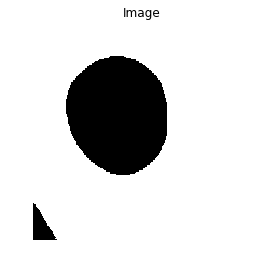

facade label:-


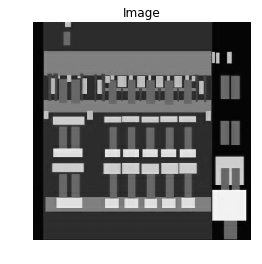

facade real_image:-


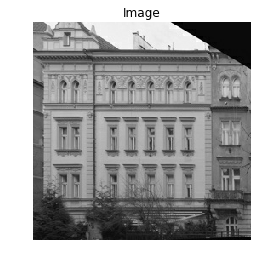

facade generated_image:-


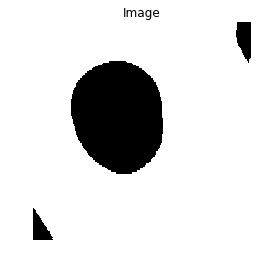

facade label:-


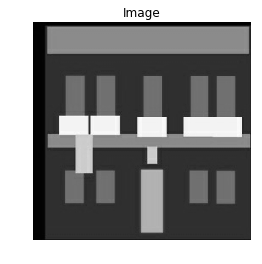

facade real_image:-


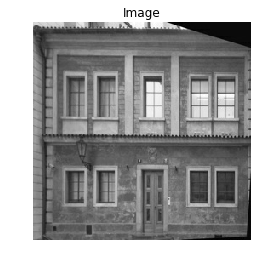

facade generated_image:-


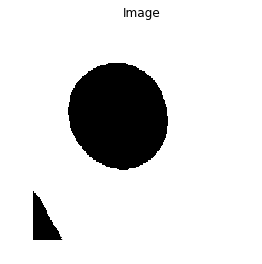

Epoch 1
Batch:0
Discriminator loss: -0.0
Generator loss: [11349.518, 113.49518, 0.0]
Batch:1
Discriminator loss: 15.379092
Generator loss: [11788.52, 117.88519, 0.0]
Batch:2
Discriminator loss: -0.0
Generator loss: [11380.162, 113.80162, 0.0]
Batch:3
Discriminator loss: 15.379092
Generator loss: [11736.266, 117.362656, 0.0]
Batch:4
Discriminator loss: -0.0
Generator loss: [11591.006, 115.91006, 0.0]
Batch:5
Discriminator loss: 15.379092
Generator loss: [11541.652, 115.41653, 0.0]
Batch:6
Discriminator loss: -0.0
Generator loss: [11726.273, 117.26273, 0.0]
Batch:7
Discriminator loss: 15.379092
Generator loss: [11008.56, 110.085594, 0.0]
Batch:8
Discriminator loss: -0.0
Generator loss: [11524.986, 115.24986, 0.0]
Batch:9
Discriminator loss: 15.379092
Generator loss: [11484.185, 114.84184, 0.0]
Batch:10
Discriminator loss: -0.0
Generator loss: [10806.002, 108.06002, 0.0]
Batch:11
Discriminator loss: 15.379092
Generator loss: [11560.5205, 115.6052, 0.0]
Batch:12
Discriminator loss: -0.0
Ge

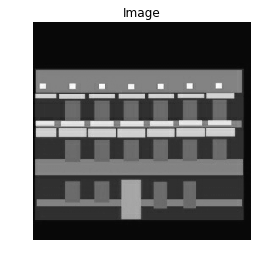

facade real_image:-


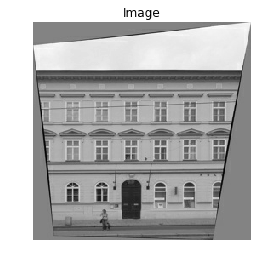

facade generated_image:-


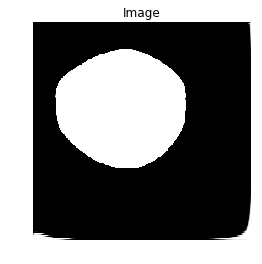

facade label:-


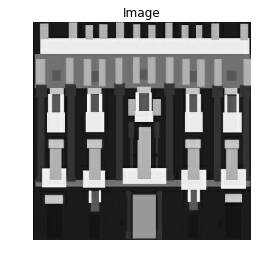

facade real_image:-


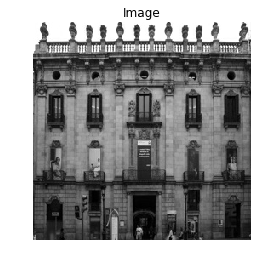

facade generated_image:-


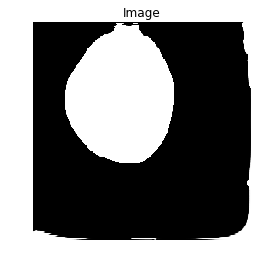

facade label:-


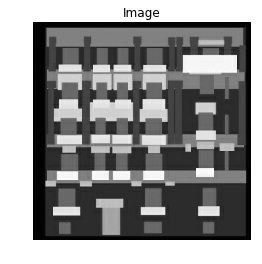

facade real_image:-


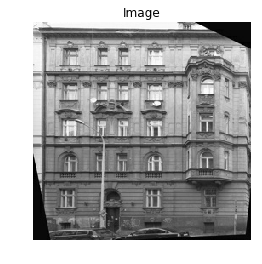

facade generated_image:-


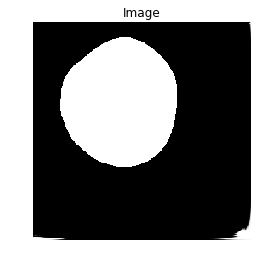

facade label:-


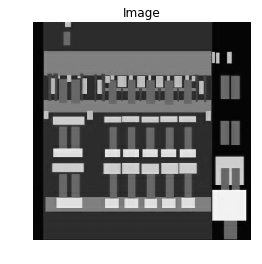

facade real_image:-


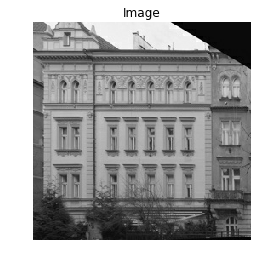

facade generated_image:-


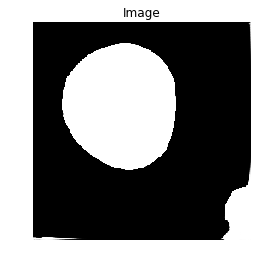

facade label:-


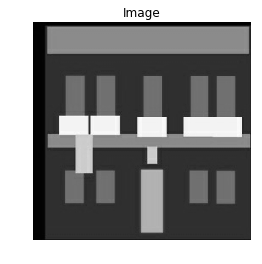

facade real_image:-


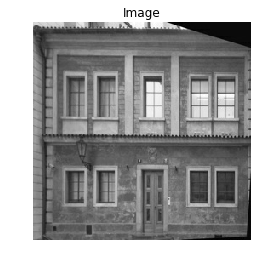

facade generated_image:-


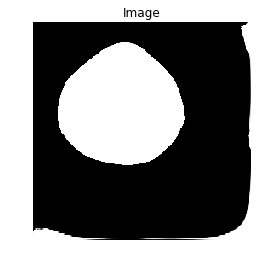

Epoch 3
Batch:0
Discriminator loss: -0.0
Generator loss: [11347.557, 113.47556, 0.0]
Batch:1
Discriminator loss: 15.379092
Generator loss: [11787.246, 117.87246, 0.0]
Batch:2
Discriminator loss: -0.0
Generator loss: [11379.619, 113.79619, 0.0]
Batch:3
Discriminator loss: 15.379092
Generator loss: [11736.07, 117.3607, 0.0]
Batch:4
Discriminator loss: -0.0
Generator loss: [11590.948, 115.909485, 0.0]
Batch:5
Discriminator loss: 15.379092
Generator loss: [11541.652, 115.41652, 0.0]
Batch:6
Discriminator loss: -0.0
Generator loss: [11726.273, 117.26273, 0.0]
Batch:7
Discriminator loss: 15.379092
Generator loss: [11008.56, 110.085594, 0.0]
Batch:8
Discriminator loss: -0.0
Generator loss: [11524.986, 115.24986, 0.0]
Batch:9
Discriminator loss: 15.379092
Generator loss: [11484.185, 114.84184, 0.0]
Batch:10
Discriminator loss: -0.0
Generator loss: [10806.002, 108.06002, 0.0]
Batch:11
Discriminator loss: 15.379092
Generator loss: [11560.5205, 115.6052, 0.0]
Batch:12
Discriminator loss: -0.0
Gen

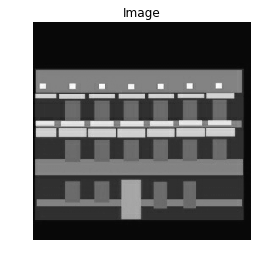

facade real_image:-


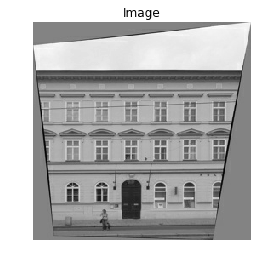

facade generated_image:-


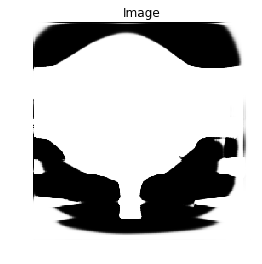

facade label:-


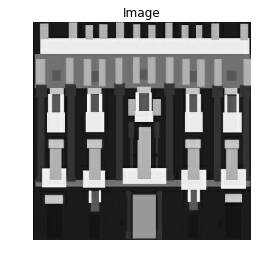

facade real_image:-


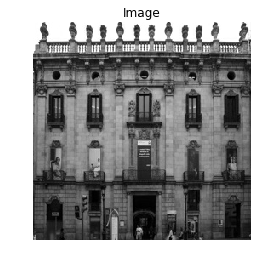

facade generated_image:-


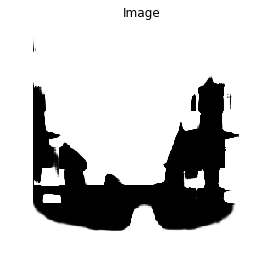

facade label:-


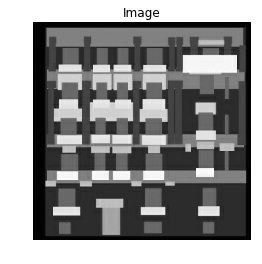

facade real_image:-


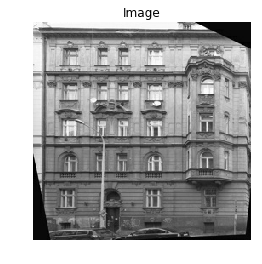

facade generated_image:-


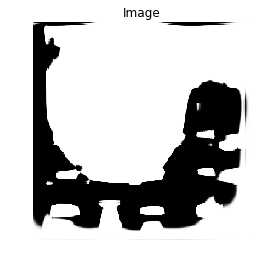

facade label:-


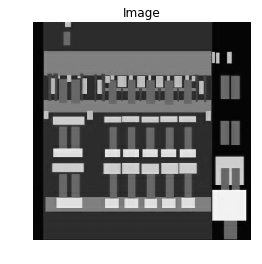

facade real_image:-


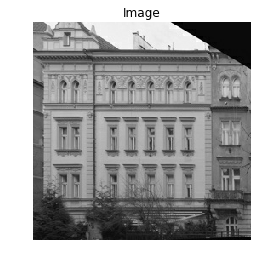

facade generated_image:-


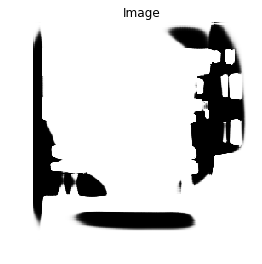

facade label:-


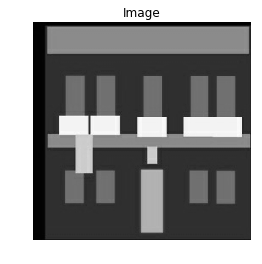

facade real_image:-


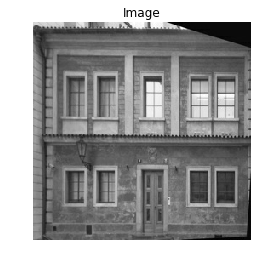

facade generated_image:-


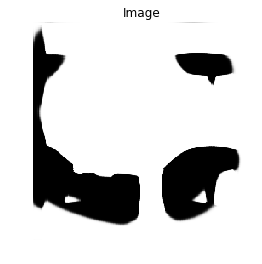

Epoch 5
Batch:0
Discriminator loss: -0.0
Generator loss: [11347.557, 113.47556, 0.0]
Batch:1
Discriminator loss: 15.379092
Generator loss: [11787.246, 117.87246, 0.0]
Batch:2
Discriminator loss: -0.0
Generator loss: [11379.619, 113.79619, 0.0]
Batch:3
Discriminator loss: 15.379092
Generator loss: [11736.07, 117.3607, 0.0]
Batch:4
Discriminator loss: -0.0
Generator loss: [11590.948, 115.909485, 0.0]
Batch:5
Discriminator loss: 15.379092
Generator loss: [11541.652, 115.41652, 0.0]
Batch:6
Discriminator loss: -0.0
Generator loss: [11726.273, 117.26273, 0.0]
Batch:7
Discriminator loss: 15.379092
Generator loss: [11008.56, 110.085594, 0.0]
Batch:8
Discriminator loss: -0.0
Generator loss: [11524.986, 115.24986, 0.0]
Batch:9
Discriminator loss: 15.379092
Generator loss: [11484.185, 114.84184, 0.0]
Batch:10
Discriminator loss: -0.0
Generator loss: [10806.002, 108.06002, 0.0]
Batch:11
Discriminator loss: 15.379092
Generator loss: [11560.5205, 115.6052, 0.0]
Batch:12
Discriminator loss: -0.0
Gen

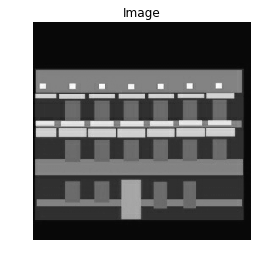

facade real_image:-


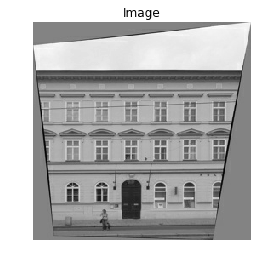

facade generated_image:-


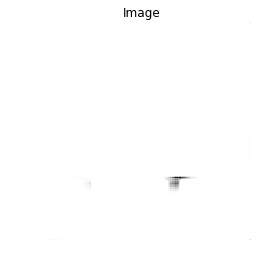

facade label:-


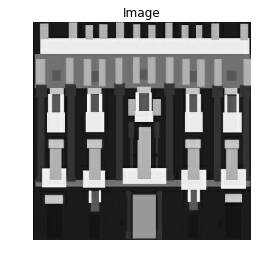

facade real_image:-


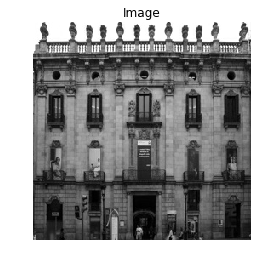

facade generated_image:-


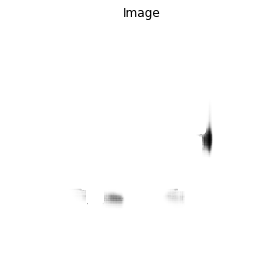

facade label:-


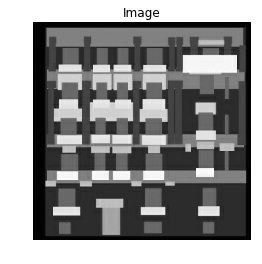

facade real_image:-


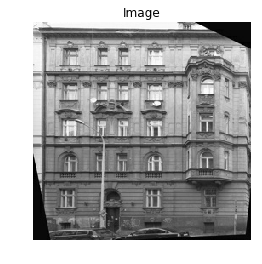

facade generated_image:-


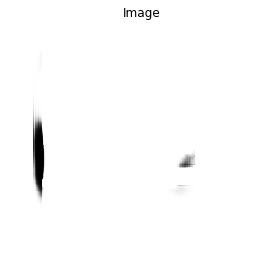

facade label:-


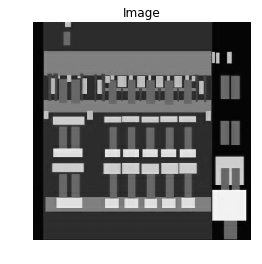

facade real_image:-


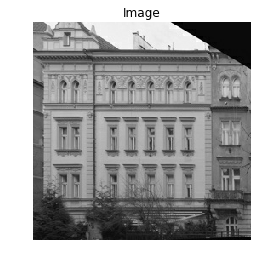

facade generated_image:-


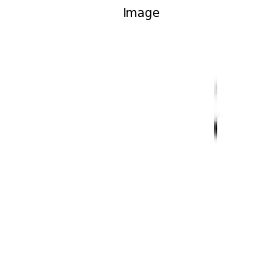

facade label:-


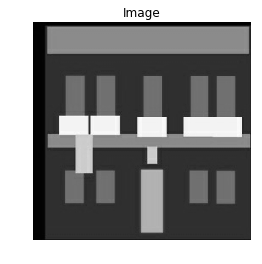

facade real_image:-


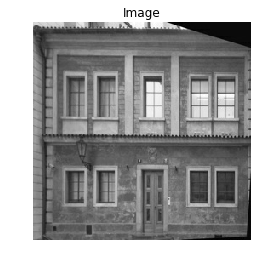

facade generated_image:-


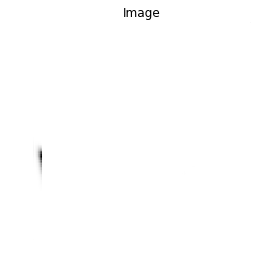

Epoch 7
Batch:0
Discriminator loss: -0.0
Generator loss: [11347.557, 113.47556, 0.0]
Batch:1
Discriminator loss: 15.379092
Generator loss: [11787.246, 117.87246, 0.0]
Batch:2
Discriminator loss: -0.0
Generator loss: [11379.619, 113.79619, 0.0]
Batch:3
Discriminator loss: 15.379092
Generator loss: [11736.07, 117.3607, 0.0]
Batch:4
Discriminator loss: -0.0
Generator loss: [11590.948, 115.909485, 0.0]
Batch:5
Discriminator loss: 15.379092
Generator loss: [11541.652, 115.41652, 0.0]
Batch:6


In [ ]:
    print('Starting the training...')
    for epoch in range(0, epochs):
        print('Epoch {}'.format(epoch))

        dis_losses = []
        gen_losses = []

        batch_counter = 1
        start = time.time()

        num_batches = int(training_facade_photos.shape[0] / batch_size)

        # Train the networks for number of batches
        for index in range(int(training_facade_photos.shape[0] / batch_size)):
            print("Batch:{}".format(index))

            # Sample a batch of training and validation images
            train_facades_batch = training_facade_labels[index * batch_size:(index + 1) * batch_size]
            train_images_batch = training_facade_photos[index * batch_size:(index + 1) * batch_size]

            val_facades_batch = validation_facade_labels[index * batch_size:(index + 1) * batch_size]
            val_images_batch = validation_facade_photos[index * batch_size:(index + 1) * batch_size]

            patches, labels = generate_and_extract_patches(train_images_batch, train_facades_batch, unet_generator,
                                                           batch_counter, patch_dim)

            """
            Train the discriminator model
            """
            d_loss = patchgan_discriminator.train_on_batch(patches, labels)

            labels = np.zeros((train_images_batch.shape[0], 2), dtype=np.uint8)
            labels[:, 1] = 1

            """
            Train the adversarial model
            """
            g_loss = adversarial_model.train_on_batch(train_facades_batch, [train_images_batch, labels])

            # Increase the batch counter
            batch_counter += 1

            print("Discriminator loss:", d_loss)
            print("Generator loss:", g_loss)

            gen_losses.append(g_loss[1])
            dis_losses.append(d_loss)

#         """
#         Save losses to Tensorboard after each epoch
#         """
#         write_log(tensorboard, 'discriminator_loss', np.mean(dis_losses), epoch)
#         write_log(tensorboard, 'generator_loss', np.mean(gen_losses), epoch)

        # After every 2nd epoch, generate and save images for visualization
        if epoch % 2 == 0:
            # Sample a batch of validation datasets
            val_facades_batch = validation_facade_labels[0:5]
            val_images_batch = validation_facade_photos[0:5]

            # Generate images
            validation_generated_images = unet_generator.predict(val_facades_batch)

            #print(validation_generated_images[0])
            
            for x in range (5):
                print("facade label:-")
                visualize_bw_image(val_facades_batch[x])
                print("facade real_image:-")
                visualize_bw_image(val_images_batch[x])
                print("facade generated_image:-")
                visualize_bw_image(validation_generated_images[x])


            # Save images
            save_images(val_images_batch, val_facades_batch, validation_generated_images, epoch, 'validation', limit=5)

    # Save models
    unet_generator.save_weights("generator.h5")
    patchgan_discriminator.save_weights("discriminator.h5")

In [ ]:
# train_facades_batch = training_facade_labels[0:1]
# output_images = unet_generator.predict(train_facades_batch)


In [ ]:
for x in range(5):
    print (x)